In [1]:
import pandas as pd
print("Pandas: ", pd.__version__)
import sklearn as sk
print("Scikit-learn: ", sk.__version__)
import matplotlib.pyplot as plt
import matplotlib
print("Matplotlib: ", matplotlib.__version__)
import numpy as np
print("Numpy: ", np.__version__)
from pprint import pprint
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

Pandas:  2.2.2
Scikit-learn:  1.6.1
Matplotlib:  3.10.0
Numpy:  2.0.2


In this notebook, I'm going to show the workflow on the task of **customer segmentation** based on **credit card score**, using mostly the clusterization of clients.

To begin with, we shall start by importing and loading the dataset as a pandas DataFrame.

In [2]:
import kagglehub
from pathlib import Path
# Download latest version
path = Path( kagglehub.dataset_download("arjunbhasin2013/ccdata") )

print("Path to dataset files:", path)

100%|██████████| 340k/340k [00:00<00:00, 693kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


Now, we explore the files that we have downloded in the directory

In [3]:
files = [x for x in path.iterdir()]
files

[PosixPath('/root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1/CC GENERAL.csv')]

Now, we load the dataset, and perform an exploration of the dataset

In [4]:
dataset = pd.read_csv(files[0])

In [5]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
dataset.drop('CUST_ID', axis=1, inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [8]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
dataset.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


The dataset contains some null values, and no categorical variables, but the values amongs the columns are quite different, so we require a proper normalization of the values.

The strategy is to set the nan values to the mean, to avoid loossing other information, but making that such values add no information to the sample.

In [10]:
impute = sk.impute.SimpleImputer(strategy='mean')

In [11]:
dataset.iloc[:,:] = impute.fit_transform(dataset)

In [12]:
dataset.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [13]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


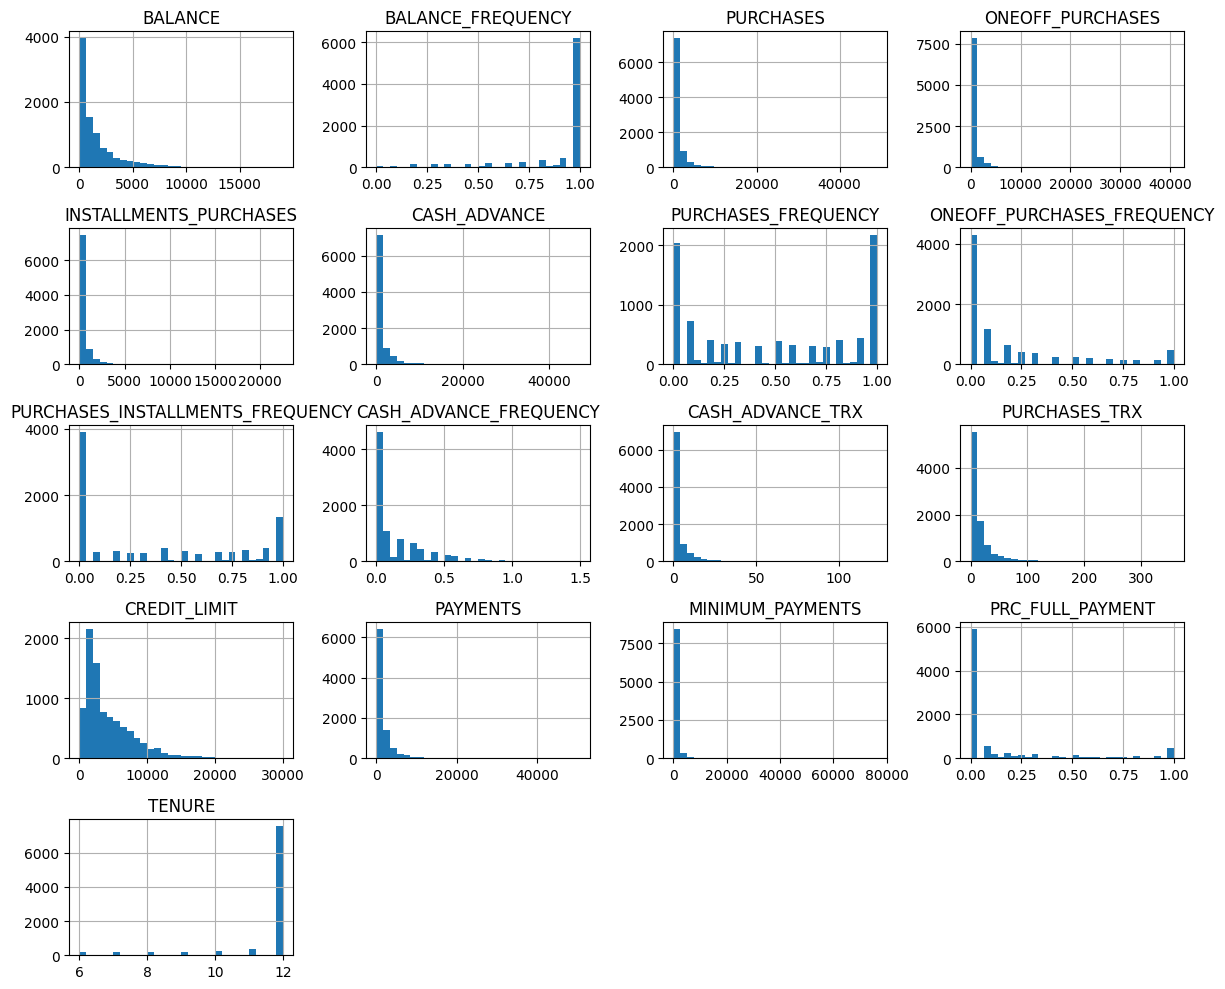

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot()
dataset.hist(ax=ax, bins=30)

plt.tight_layout()
plt.show()

Clearly we can see that most of the different variables histograms looks the same, meaning that not really all the variables will give some usefull information

In [15]:
transformer = sk.preprocessing.StandardScaler().fit(dataset)
transformed_values = transformer.transform(dataset)

In [16]:
dataset.iloc[:,:] = transformed_values

Our goal now is to construct a normed vector space $V$ where we can _differentiate_ between different classes of costumers. Our main purpose is that, given the dataset, we want to sectorize or identify different costumers.

Once we have standarized our dataset, now we have to think about the method to construct our normed vector space for identifying the differences between the costumers. We will make use of the PCA dimensionality reduction technique

# PCA approx (eigenspace of the variance-covariance matrix)

The first approach is an old one, consisting of the diagonalization of the variance-covariance matrix, to obtain the eigenspace that most describes the variance.

In [17]:
corr_matrix = np.cov(transformed_values.T)

In [18]:
eigvals, eigvecs = np.linalg.eig(corr_matrix)

<function matplotlib.pyplot.show(close=None, block=None)>

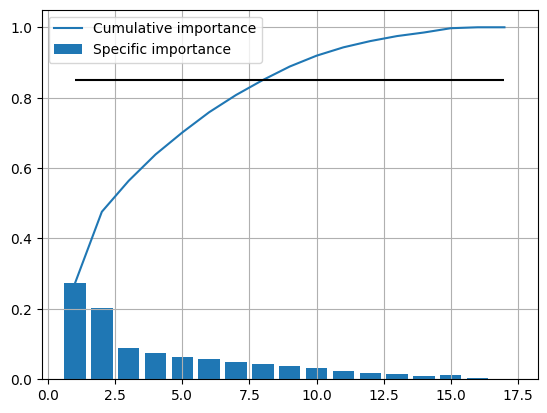

In [19]:
norm_eigvals = eigvals / np.sum(eigvals)
#print(np.cumsum(norm_eigvals))
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(1, len(norm_eigvals)+1), np.cumsum(norm_eigvals), label='Cumulative importance')
ax.bar(range(1, len(norm_eigvals)+1), norm_eigvals, label='Specific importance')
ax.hlines(0.85, xmin=1, xmax=17, color='black')
ax.grid()
ax.legend()
plt.show

As we can see, the two first eigenspaces shine for having the largest eigenvalues with difference, describing almost the 60% of the total variance. We will assume that this value is fair enough, and since the relative weight of the other eigenvalues is much lower, we will go ahead with a new space of dimension 2

In [20]:
X = transformed_values @ eigvecs[:, 0:3]

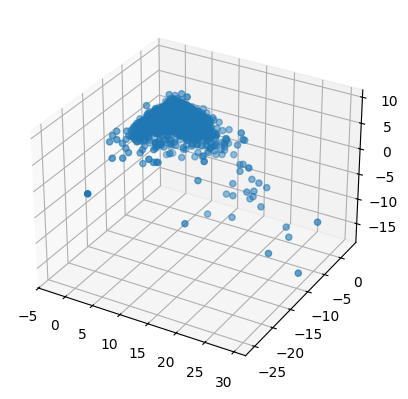

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
plt.show()

# Clustering

Now that we have built our space were we can capture specific relations of the data, is time to clusterisize! We will again use two different alorithms, to showcase the different results.

## K-NN

We will run first k-means with the PCA approach. Instead of the three dimensional space that we have previously built, we will employ the number of principal components that describes at most the 90% of the total variance of the sample.

In [22]:
pca_space = dataset.values @ eigvecs[:, 0:3]

shs = []
cs = list(range(2,20))
for c in cs:
  kmeans_clustering = sk.cluster.KMeans(n_clusters=c, init='k-means++')
  kmeans_clusters = kmeans_clustering.fit(pca_space)

  sh_score = sk.metrics.silhouette_score(pca_space, kmeans_clusters.labels_)
  shs.append(sh_score)

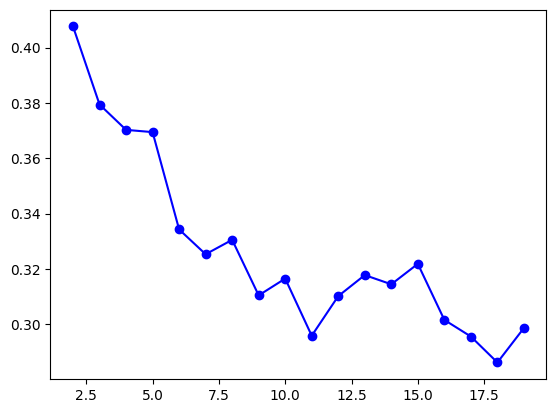

In [23]:
plt.plot(cs, shs, 'bo-')

As it can be seen, the best model is when we consider only two clusters. Let's try to see these clusters

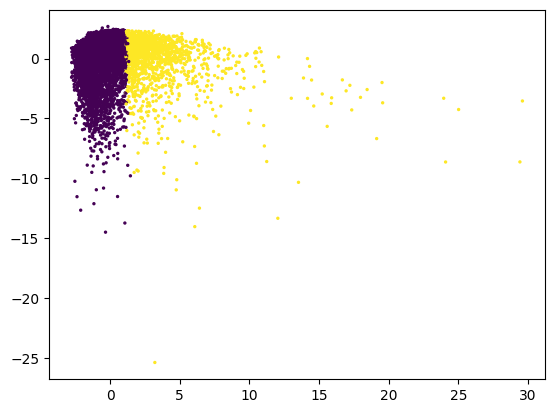

In [24]:
fig = plt.figure()
ax = fig.add_subplot()
clusters = sk.cluster.KMeans(n_clusters=2, init='k-means++').fit(pca_space)
ax.scatter(pca_space[:,0], pca_space[:,1], c=clusters.labels_, s=2)
plt.show()

K-means is known to fail with non-uniform clusters, so let's try with HDBSCAN, a density-based approach

array([[<Axes: xlabel='BALANCE', ylabel='BALANCE'>,
        <Axes: xlabel='BALANCE_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES', ylabel='BALANCE'>,
        <Axes: xlabel='ONEOFF_PURCHASES', ylabel='BALANCE'>,
        <Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='BALANCE'>,
        <Axes: xlabel='CASH_ADVANCE', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='CASH_ADVANCE_TRX', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES_TRX', ylabel='BALANCE'>,
        <Axes: xlabel='CREDIT_LIMIT', ylabel='BALANCE'>,
        <Axes: xlabel='PAYMENTS', ylabel='BALANCE'>,
        <Axes: xlabel='MINIMUM_PAYMENTS', ylabel='BALANCE'>,
        <Axes: xlabel='PRC_FULL_PAYMENT', ylabel='BALANCE'>,
        <Axes: xl

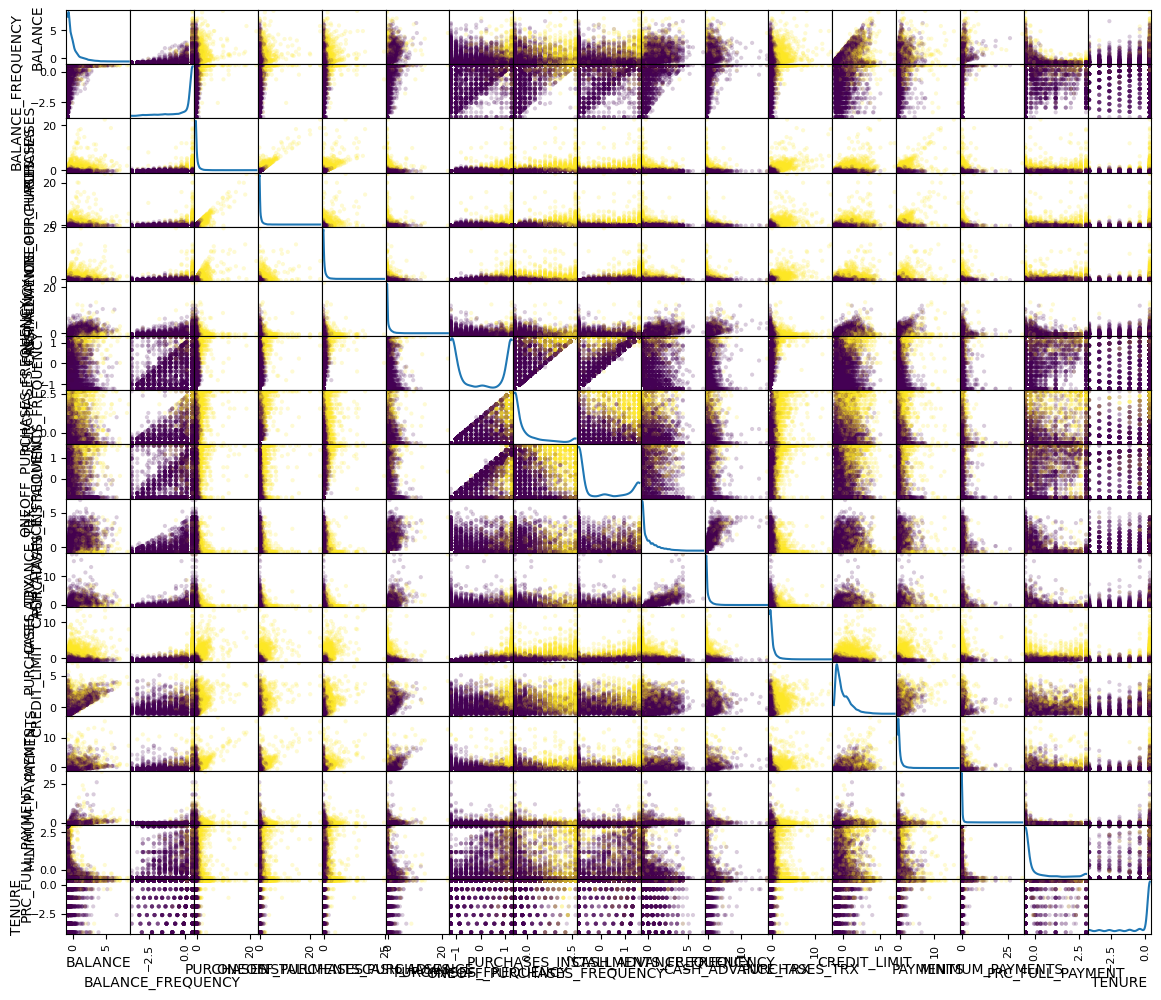

In [25]:
scatter_matrix(dataset, alpha=0.2, diagonal='kde', figsize=(14,12), c=clusters.labels_)

## HDBSCAN

We will use HDBSCAN to overcome the limitations of DBSCAN, specially in the task of having to choose the proper value of `eps`. In order to fine tune the HDBSCAN clustering algorithm, we will try to find the set of parameters where the least unlabeled points exists, and the Sihlouette metric is closer to one.

In [26]:
results = {}
for mcs in (2, 5, 10, 20, 30):
  for ms in (2, 5, 10, 20, 30):
    hdb = sk.cluster.HDBSCAN(min_cluster_size=mcs, min_samples=ms).fit(pca_space)
    if not str(mcs) in results:
      results[str(mcs)] = {}

    if not str(ms) in results[str(mcs)]:
      results[str(mcs)][str(ms)] = {}

    results[str(mcs)][str(ms)]['silhouette'] = sh_score = sk.metrics.silhouette_score(pca_space, hdb.labels_)

    num_indefinides = hdb.labels_[hdb.labels_ > 0].shape[0]
    results[str(mcs)][str(ms)]['indefs'] = num_indefinides

    clusters_labels = np.unique(hdb.labels_)
    clusters_labels = clusters_labels[clusters_labels > 0]
    results[str(mcs)][str(ms)]['num_clusters'] = np.max(clusters_labels) + 1

In [27]:
pprint(results)

{'10': {'10': {'indefs': 6431,
               'num_clusters': np.int64(4),
               'silhouette': np.float64(-0.1322043385977939)},
        '2': {'indefs': 4102,
              'num_clusters': np.int64(221),
              'silhouette': np.float64(-0.3150706662293693)},
        '20': {'indefs': 1484,
               'num_clusters': np.int64(11),
               'silhouette': np.float64(-0.39505614733913286)},
        '30': {'indefs': 2286,
               'num_clusters': np.int64(7),
               'silhouette': np.float64(-0.2824881015469653)},
        '5': {'indefs': 2378,
              'num_clusters': np.int64(99),
              'silhouette': np.float64(-0.49831891000471473)}},
 '2': {'10': {'indefs': 8760,
              'num_clusters': np.int64(4),
              'silhouette': np.float64(0.6033448602578635)},
       '2': {'indefs': 7275,
             'num_clusters': np.int64(2489),
             'silhouette': np.float64(0.14912013003610072)},
       '20': {'indefs': 6110,
          

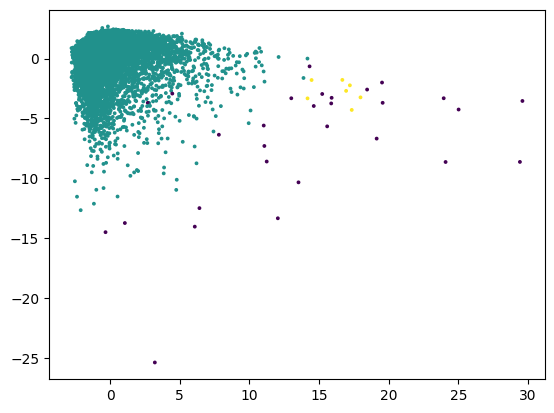

In [28]:
fig = plt.figure()
ax = fig.add_subplot()
clusters = sk.cluster.HDBSCAN(min_cluster_size=5, min_samples=10).fit(pca_space)
ax.scatter(pca_space[:,0], pca_space[:,1], c=clusters.labels_, s=3)
plt.show()

array([[<Axes: xlabel='BALANCE', ylabel='BALANCE'>,
        <Axes: xlabel='BALANCE_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES', ylabel='BALANCE'>,
        <Axes: xlabel='ONEOFF_PURCHASES', ylabel='BALANCE'>,
        <Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='BALANCE'>,
        <Axes: xlabel='CASH_ADVANCE', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='ONEOFF_PURCHASES_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES_INSTALLMENTS_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='CASH_ADVANCE_FREQUENCY', ylabel='BALANCE'>,
        <Axes: xlabel='CASH_ADVANCE_TRX', ylabel='BALANCE'>,
        <Axes: xlabel='PURCHASES_TRX', ylabel='BALANCE'>,
        <Axes: xlabel='CREDIT_LIMIT', ylabel='BALANCE'>,
        <Axes: xlabel='PAYMENTS', ylabel='BALANCE'>,
        <Axes: xlabel='MINIMUM_PAYMENTS', ylabel='BALANCE'>,
        <Axes: xlabel='PRC_FULL_PAYMENT', ylabel='BALANCE'>,
        <Axes: xl

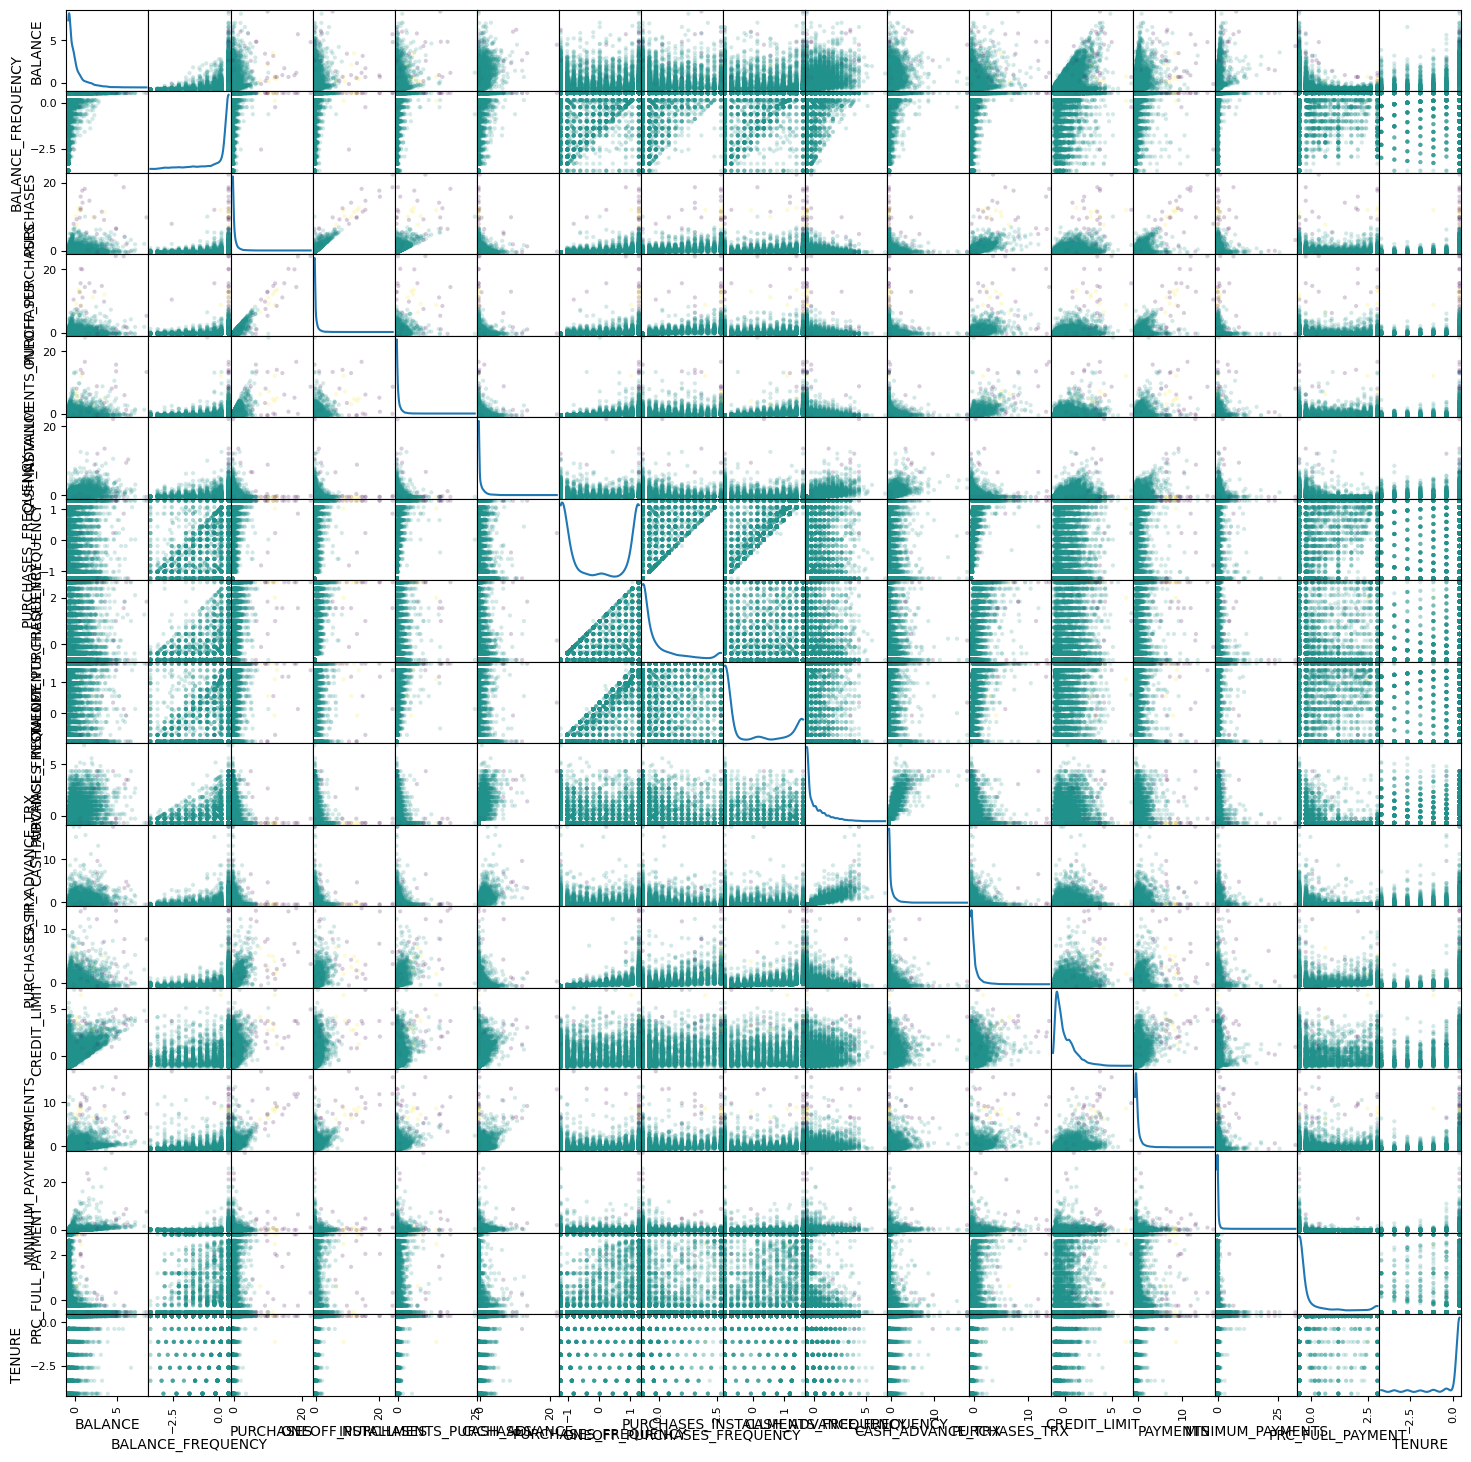

In [29]:
scatter_matrix(dataset, alpha=0.2, diagonal='kde', figsize=(18,18), c=clusters.labels_)